In [1]:
%matplotlib inline 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import random
import re
import time
import math
import os
import sys
from sklearn.utils import shuffle

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy

Using TensorFlow backend.


In [2]:
import importlib
sys.path.append('..')
import Shared  # Shared.py holds functions common to all notebooks
importlib.reload(Shared)  # In case you make changes to the Shared.py file and don't want to restart the nb kernel 

<module 'Shared' from '/home/eduardo/Desktop/Link to dynamic-projections/Models/Shared.py'>

In [3]:
nb_name = 'cifar10cnn-AE_10f_10f_2f_20ep'

In [4]:
X, info_df, n_revisions, indexes_order = Shared.load_tabular('../../Datasets/cifar10cnn/')

In [5]:
os.getcwd()

'/home/eduardo/PhD/Projections/dynamic-projections/Models/ae'

In [6]:
info_df.head()

,X_index,cat,point_id,t
0,0,t,truck-225,11
1,1,h,horse-794,26
2,2,f,frog-163,24
3,3,t,truck-591,16
4,4,d,dog-631,25


In [7]:
# info_df[info_df['point_id'] == 'a-0']

In [8]:
n = X.shape[1]
ae = Sequential()
ae.add(Dense(10, activation='relu', input_shape=(n,)))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(2))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(n))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
ae.compile(loss='mse', optimizer='rmsprop')

In [10]:
%time ae.fit(X, X, nb_epoch=20)

Instructions for updating:
Use tf.cast instead.


/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
30000/30000 [==============================] - 2s 56us/step - loss: 0.0184
Epoch 2/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0075
Epoch 3/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0055
Epoch 4/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.0050
Epoch 5/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0045
Epoch 6/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.0041
Epoch 7/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.0038
Epoch 8/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.0036
Epoch 9/100
30000/30000 [==============================] - 1s 47us/step - loss: 0.0034
Epoch 10/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0033
Epoch 11/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0033
Epoch 12/100
30000/30000 [===============

30000/30000 [==============================] - 1s 44us/step - loss: 0.0023
Epoch 95/100
30000/30000 [==============================] - 1s 43us/step - loss: 0.0023
Epoch 96/100
30000/30000 [==============================] - 1s 43us/step - loss: 0.0023
Epoch 97/100
30000/30000 [==============================] - 1s 45us/step - loss: 0.0023
Epoch 98/100
30000/30000 [==============================] - 1s 44us/step - loss: 0.0023
Epoch 99/100
30000/30000 [==============================] - 1s 42us/step - loss: 0.0023
Epoch 100/100
30000/30000 [==============================] - 1s 43us/step - loss: 0.0023
CPU times: user 3min 29s, sys: 20 s, total: 3min 49s
Wall time: 2min 32s


In [11]:
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 492
Trainable params: 492
Non-trainable params: 0
_________________________________________________________________


In [12]:
# ae.save('../Models/{}.h5'.format(nb_name))

Text(0.5, 0.98, 'loss')

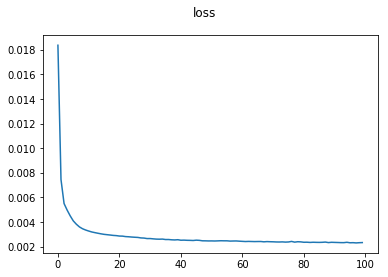

In [13]:
plt.figure()
plt.plot(ae.history.history['loss'])
plt.suptitle('loss')

In [14]:
n_revisions = info_df['t'].max() + 1

In [15]:
Shared.save_tabular_activations(ae, X, info_df, n_revisions, indexes_order, nb_name)

,id,t0d0,t0d1,t1d0,t1d1,t2d0,t2d1,t3d0,t3d1,t4d0,...,t25d0,t25d1,t26d0,t26d1,t27d0,t27d1,t28d0,t28d1,t29d0,t29d1
0,cat-0,-0.882172,1.029554,-0.311318,0.553067,-0.624207,0.763405,-0.915777,0.853813,-0.437617,...,-0.094004,0.466846,-0.072632,0.443861,-0.088698,0.458018,-0.078831,0.444589,-0.066309,0.446319
1,ship-1,0.859545,-1.001810,1.034214,-1.066528,0.574990,-0.636573,1.116956,-1.095428,1.245149,...,0.212033,-0.291158,0.880395,-0.858652,1.606305,-1.490421,1.237971,-1.168880,1.198900,-1.150136
2,ship-2,1.724556,-1.096972,1.403541,-1.355939,1.013982,-1.023154,1.080744,-1.070349,1.327857,...,1.871634,-1.733937,1.910034,-1.754282,1.565294,-1.483925,1.994381,-1.837483,1.294438,-1.240104
3,airplane-3,1.955626,-1.244379,2.448697,-1.819531,2.330924,-1.702798,2.637711,-1.925572,2.698081,...,2.289659,-0.990252,2.329458,-1.089885,2.311241,-1.004706,2.330783,-1.044424,2.249241,-0.909000
4,frog-4,0.115074,0.328545,0.061162,0.315927,0.137278,0.347404,0.318146,0.429166,0.918539,...,-1.756663,1.281939,-1.492867,1.117117,-1.957378,1.406276,-1.884538,1.368875,-2.064792,1.477042
5,frog-5,-0.968963,0.889043,-0.112995,-0.104598,-0.180812,-0.129651,-1.409482,1.125557,-1.660097,...,-2.075089,1.496261,-2.129837,1.525690,-2.047312,1.473409,-2.039916,1.469913,-2.082601,1.498114
6,automobile-6,-0.266250,-0.149810,-0.340868,-0.188472,-0.344729,-0.184641,-0.274736,-0.184731,-0.286711,...,-0.368425,-0.171573,-0.338494,-0.157247,-0.355662,-0.185890,-0.378357,-0.251878,-0.299509,-0.167613
7,frog-7,0.147600,0.322935,0.053385,0.302185,-1.014851,0.851064,-1.277420,1.010851,-0.395358,...,1.561001,1.640076,2.135217,2.335472,1.555398,1.422666,1.348233,1.357468,1.128238,1.257868
8,cat-8,0.427002,0.267990,-0.070032,0.470842,-0.396065,0.701481,-0.306379,0.597418,0.016050,...,-0.072549,0.447566,-0.014455,0.410034,-0.081470,0.453001,-0.081485,0.449436,-0.067265,0.447058
9,automobile-9,0.601873,-0.809833,0.204530,-0.490264,-0.316590,-0.202560,-0.356669,-0.225097,-0.365273,...,-0.404071,-0.181982,-0.417995,-0.235932,-0.413053,-0.223261,-0.412005,-0.229496,-0.402229,-0.213942
